# Projeto Prático 02 - Classificação K-Means

A aplicação de IA utiliza o algoritmo K-Means, onde foi testado sua implementação feita a mão, e a oferecida pelo sklearn. A passo a passo ele está detalhado abaixo.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans as SKLearnKMeans
import matplotlib.pyplot as plt
import time

In [2]:
# Lendo o arquivo CSV das flores.
dados = pd.read_csv('Iris.csv')  # CSV fornecido

features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

X = dados[features].values 

In [3]:
# Função para calcular distância euclidiana
def euclidean_distance(a, b):
    return np.linalg.norm(a - b, axis=1)

## Aplicação - Implementação desenvolvida a mão

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

class KMeansHardcore:
    def __init__(self, n_clusters=3, max_iter=300, tol=1e-4):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.centroids = None
        self.labels = None

    def fit(self, X):
        n_samples, n_features = X.shape
        random_idx = np.random.choice(n_samples, self.n_clusters, replace=False)
        self.centroids = X[random_idx]

        for _ in range(self.max_iter):
            labels = []
            for x in X:
                distances = np.linalg.norm(x - self.centroids, axis=1)
                labels.append(np.argmin(distances))
            labels = np.array(labels)

            new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(self.n_clusters)])
            if np.all(np.linalg.norm(new_centroids - self.centroids, axis=1) < self.tol):
                break
            self.centroids = new_centroids

        self.labels = labels
        return self

    def predict(self, X):
        labels = []
        for x in X:
            distances = np.linalg.norm(x - self.centroids, axis=1)
            labels.append(np.argmin(distances))
        return np.array(labels)

# ===============================
# Experimentos com K=3 e K=5
# ===============================
start_hardcore = time.time()
kmeans_3_hc = KMeansHardcore(n_clusters=3).fit(X_scaled)
kmeans_5_hc = KMeansHardcore(n_clusters=5).fit(X_scaled)
end_hardcore = time.time()

score_3_hc = silhouette_score(X_scaled, kmeans_3_hc.labels)
score_5_hc = silhouette_score(X_scaled, kmeans_5_hc.labels)

print("K-Means Hardcore")
print(f"Silhouette Score (3 clusters): {score_3_hc}")
print(f"Silhouette Score (5 clusters): {score_5_hc}")
print(f"Tempo de execução: {end_hardcore - start_hardcore:.4f} segundos\n")

K-Means Hardcore
Silhouette Score (3 clusters): 0.4556692449110409
Silhouette Score (5 clusters): 0.38789286988359817
Tempo de execução: 0.0674 segundos



## Aplicação - Implementação da biblioteca Sklearn

In [5]:
start_sklearn = time.time()
kmeans_3_sk = SKLearnKMeans(n_clusters=3, random_state=0, n_init=10).fit(X_scaled)
kmeans_5_sk = SKLearnKMeans(n_clusters=5, random_state=0, n_init=10).fit(X_scaled)
end_sklearn = time.time()

score_3_sk = silhouette_score(X_scaled, kmeans_3_sk.labels_)
score_5_sk = silhouette_score(X_scaled, kmeans_5_sk.labels_)

print("K-Means Sklearn")
print(f"Silhouette Score (3 clusters): {score_3_sk}")
print(f"Silhouette Score (5 clusters): {score_5_sk}")
print(f"Tempo de execução: {end_sklearn - start_sklearn:.4f} segundos\n")

K-Means Sklearn
Silhouette Score (3 clusters): 0.4589717867018717
Silhouette Score (5 clusters): 0.34805236242232845
Tempo de execução: 1.6897 segundos



# Redução da Dimensionalidade atráves da técnica de PCA

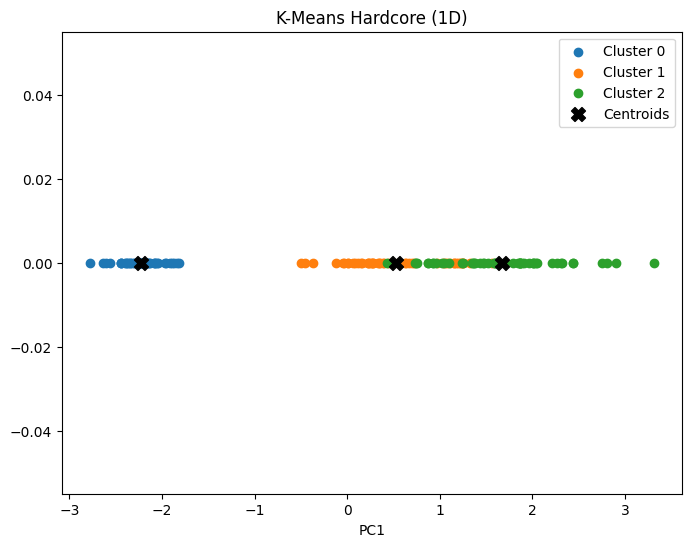

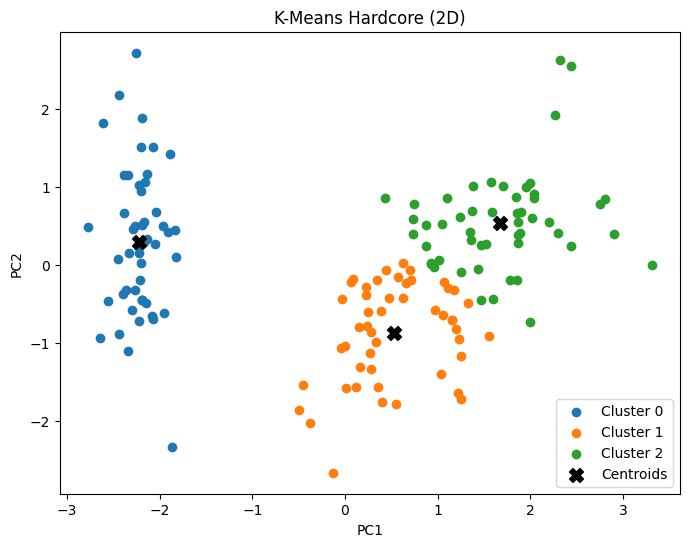

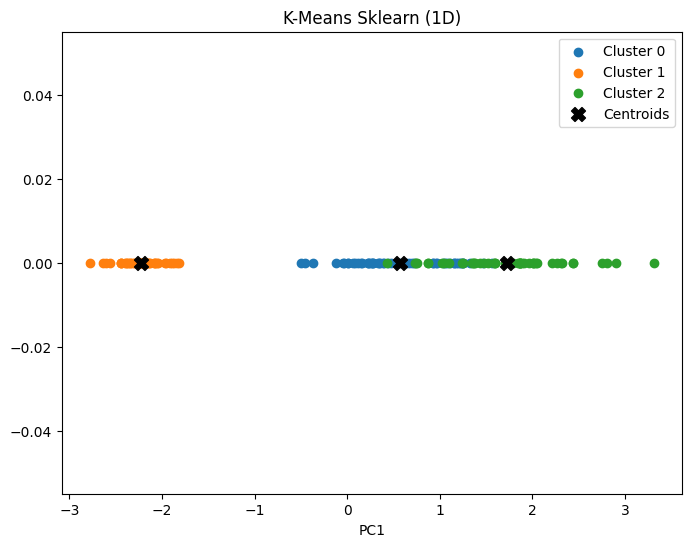

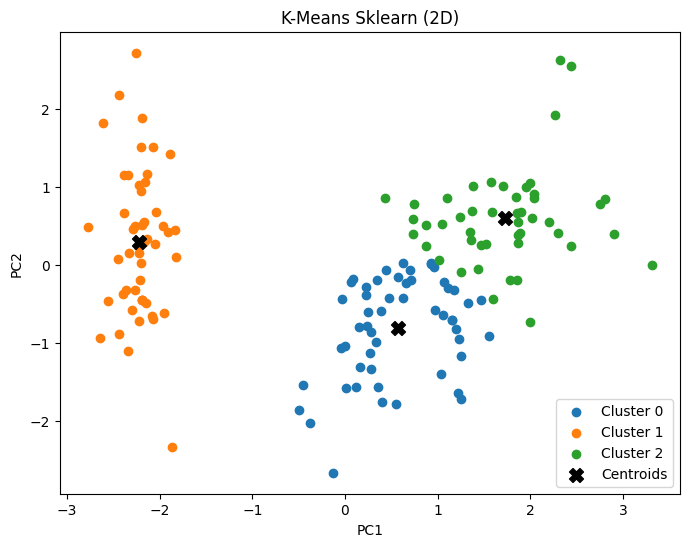

In [6]:
# ===============================
# 5. PCA + Visualização (melhor K)
# ===============================
best_k = 3  # supondo que k=3 tenha melhor score
best_labels_hc = kmeans_3_hc.labels
best_centroids_hc = kmeans_3_hc.centroids
best_labels_sk = kmeans_3_sk.labels_
best_centroids_sk = kmeans_3_sk.cluster_centers_

def plot_clusters(X, labels, centroids=None, title="Clusters", n_components=2):
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)
    plt.figure(figsize=(8,6))
    
    for cluster in np.unique(labels):
        plt.scatter(X_pca[labels == cluster, 0],
                    X_pca[labels == cluster, 1] if n_components>1 else np.zeros(sum(labels==cluster)),
                    label=f"Cluster {cluster}")
    
    if centroids is not None:
        centroids_pca = pca.transform(centroids)
        plt.scatter(centroids_pca[:,0], centroids_pca[:,1] if n_components>1 else np.zeros(best_k),
                    color='black', marker='X', s=100, label='Centroids')
    
    plt.title(title + f" ({n_components}D)")
    plt.xlabel("PC1")
    if n_components > 1:
        plt.ylabel("PC2")
    plt.legend()
    plt.show()

# Visualização Hardcore
plot_clusters(X_scaled, best_labels_hc, best_centroids_hc, title="K-Means Hardcore", n_components=1)
plot_clusters(X_scaled, best_labels_hc, best_centroids_hc, title="K-Means Hardcore", n_components=2)

# Visualização Sklearn
plot_clusters(X_scaled, best_labels_sk, best_centroids_sk, title="K-Means Sklearn", n_components=1)
plot_clusters(X_scaled, best_labels_sk, best_centroids_sk, title="K-Means Sklearn", n_components=2)